<a href="https://colab.research.google.com/github/aish793/Sandbox/blob/master/Deep%20Learning/CNN_CIFAR%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IDL Assignment 2 - Keras and CNNs**

### Team Members


1.   Amar Shivaram - 226015
2.   Manish Bhandari - 226011
3.   Aishwarya Jauhari - 226084






## **Assigning Tensorflow version and importing the libraries required for the tasks**


In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tf.__version__

'2.2.0-rc4'

## **Load CIFAR10 dataset**

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


170500096/170498071 [==============================] - 4s 0us/step


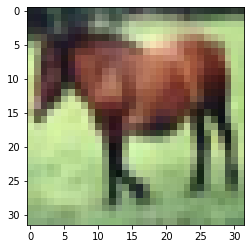

In [0]:
plt.imshow(train_images[7], cmap=plt.cm.binary)


In [0]:

# this is now different
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))


# things we really gotta do:
# - normalize the images to [0, 1] (first convert to float)
# - reshape images from (28, 28) to (784,) (although we could do this later!)
# - convert labels to int32 (otherwise tensorflow is gonna be sad :( )

#train_images = (train_images.astype(np.float32) / 255.).reshape((-1, 784))
#test_images = (test_images.astype(np.float32) / 255.).reshape((-1, 784))
train_images = (train_images.astype(np.float32) / 255.)
test_images = (test_images.astype(np.float32) / 255.)

train_labels = train_labels.astype(np.int32).reshape((-1,))
test_labels = test_labels.astype(np.int32).reshape((-1,))

train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

    


In [0]:
train_data

<TensorSliceDataset shapes: ((32, 32, 3), ()), types: (tf.float32, tf.int32)>

In [0]:
## Declare the sizes of batch, shuffle and repeat

SHUFFLE_SIZE = 10000
BATCH_SIZE = 128
REPEAT_TIMES = 3

In [0]:
def batch_shuffle_repeat(data):


    data = data.shuffle(SHUFFLE_SIZE, reshuffle_each_iteration= True)
    data = data.batch(BATCH_SIZE)    
    #data = data.repeat(REPEAT_TIMES)


    return data

In [0]:
train_data = batch_shuffle_repeat(train_data)


In [0]:
test_data = test_data.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)

In [0]:
train_labels.shape

(50000,)

## Training of the CNN Network

**Parameter Settings**

**Run 1** -- **Test Accuracy - 65.20%**


Padding - Same in all convolution layer


**epochs= 3**

![](https://drive.google.com/uc?id=1XFUK5JBv9BNq0en2PZgStjm5mXIjVZ-H)


---



**Run 2** -- **Test Accuracy - 61.39%**


Padding - valid in all convolution layer


**epochs= 3**

![alt text](https://drive.google.com/uc?id=1cF9Q-ZrTj3OJKvOWMKsMcMUuTQu8PojW)


---



**Run 3** -- **Test Accuracy - 60.58%**


Padding - same in all convolution layer


**epochs= 3**

![alt text](https://drive.google.com/uc?id=1g3D1mT4ekCEFjkFjIfQxGx6Ak3DaP5Lj)


---



**Run 4** -- **Test Accuracy - 63.67%**


Padding - same in all convolution layer


**epochs= 3**

![alt text](https://drive.google.com/uc?id=1-przRunHmx2tdlnHgbGgly9SKhr7vugg)


---



**Run 5** -- **Test Accuracy - 72.03%**


Padding - same in all convolution layer


**epochs= 3**

![alt text](https://drive.google.com/uc?id=184ub9cn6CSRqUetPOrHf0Q5lgf5MefRa)


---



**Run 6** -- **Test Accuracy - 78.26%**


Padding - same in all convolution layer


**Parameters same as run5 | epoch - 50**


---



**Run 7** -- **Test Accuracy - 78.64%**


Padding - same in all convolution layer


**Parameters same as run5 | epoch - 100**


---



**Run 8** -- **Test Accuracy - 84.03%**


Padding - same in all convolution layer and dropout(0.25) after every pooling layer


**Parameters same as run5 | epoch - 100**


---



**Run 9** -- **Test Accuracy - 85.26%**


Padding - same in all convolution layer and dropout after every pooling layer
**epoch - 100**

![alt text](https://drive.google.com/uc?id=1hd_u7o6Io6y6r5aary9f-fAll-Q5_Q8Q)


---


**Run 10** -- **Test Accuracy - 85.79%**


Padding - same in all convolution layer and dropout after every pool layer

**Parameters same as run9 | epoch - 150**


---


**Run 11** -- **Test Accuracy - 84.59%**


Padding - same in all layers.. and dropout after every pooling layer and after last FullyConnected layer and before output layer

**epoch - 200**

![alt text](https://drive.google.com/uc?id=1Ec6q-bSKCr8knxDopu5mdecis2uJ2ZDO)


---


**Run 12** -- **Test Accuracy - 85.67%**


Padding - same in all convolution layer and dropout after every pooling layer

**Parameters same as run9 |  epoch - 200**


---


**Run 13** -- **Test Accuracy - 85.82%**


Padding - same in all convolution layer and dropout after every pooling layer

**Parameters same as run9 | epoch - 400**


---


**Run 14** -- **Test Accuracy - 55.97%**


Padding - same in all convolution layer and dropout after every pooling layer


**Size of filter used is now 1**

**Parameters same as run9 | epoch - 200**


---


**Run 15** -- **Test Accuracy - 10.00%**


Padding - same in all convolution layer and dropout after every pooling layer


**Size of filter same as size of input to that layer**

**Parameters same as run9 | epoch - 200**

---



In [0]:
layers_config = [
          tf.keras.layers.Conv2D(32,3,padding='same',activation='relu',
                                 input_shape=(32,32,3),
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.Conv2D(32,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.2),

          tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.3),

          tf.keras.layers.Conv2D(128,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.Conv2D(128,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.4),

          tf.keras.layers.Conv2D(256,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation='relu'),
          #tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Dense(256,activation='relu'),
          tf.keras.layers.Dense(512,activation='relu'),
          #tf.keras.layers.Dense(1024,activation='relu'),
          tf.keras.layers.Dense(10)

]

In [0]:
## Define the model
model = tf.keras.Sequential(layers_config)


In [0]:
## Get the summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)         

In [0]:
## Define the optimizers and the losses

## Optimizer defined
opt = tf.keras.optimizers.Adam(0.001)


## Loss function defined..  
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

## Train accuracy metric
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
## Test Accuracy metric
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()


In [0]:
steps = 0

epochs = 100
for epoch in range(epochs):
  print('Start of epoch %d' % (epoch,))

  for img_batch,lbl_batch in train_data:
      steps = steps+1
      #img_batch, lbl_batch = mnist_data.next_batch()
      with tf.GradientTape(persistent=True) as tape:
          logits = model(img_batch, training=True)  # Logits for this minibatch

          # Compute the loss value for this minibatch.
          loss_value = loss_fn(lbl_batch, logits)

      # Use the gradient tape to automatically retrieve
      # the gradients of the trainable variables with respect to the loss.
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Run one step of gradient descent by updating
      # the value of the variables to minimize the loss.
      opt.apply_gradients(zip(grads, model.trainable_weights))

      train_acc_metric(lbl_batch, logits)
      
      if not steps % 100:
          # this is different from before. there, we only evaluated accuracy
          # for one batch. Now, we always average over 100 batches
          print("Loss: {} Accuracy: {}".format(loss_value, train_acc_metric.result()))
          train_acc_metric.reset_states()


In [0]:
# this is very convenient -- before, we usually had code that
# evaluates the whole test set at once -- this won't work for
# large datasets/models. With metrics, we can just iterate
# over the data and the metric takes care of averaging etc.

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.8348000049591064


### **Visualize filters**

Visualizing the 3 channels of first 6 filters

**Note:** For the “viridis” colour map we selected, yellow represents a value of 1 and dark blue a value of 0.

*Ref from:* https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

Visualizing filters for Filter number  1


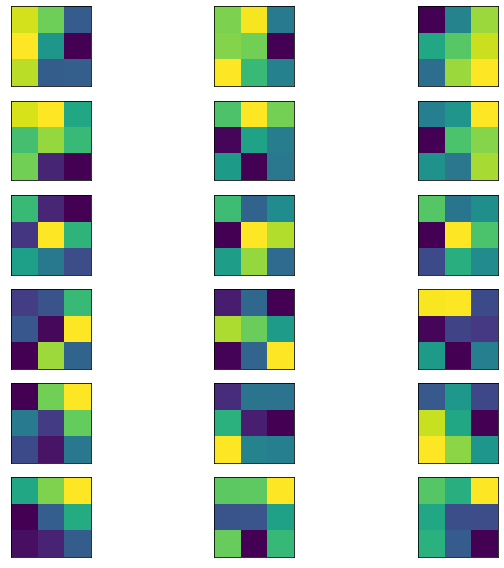

Visualizing filters for Filter number  2


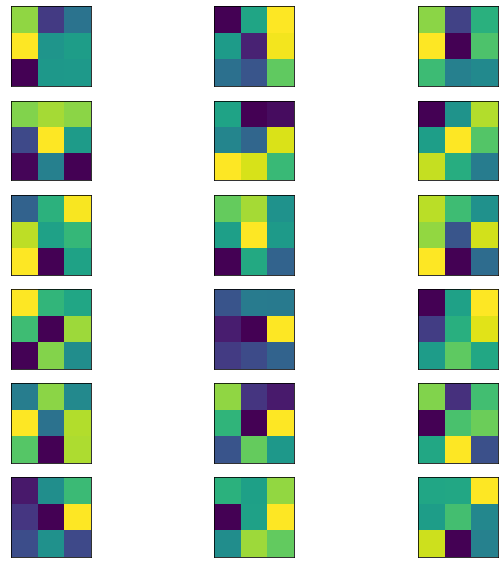

Visualizing filters for Filter number  3


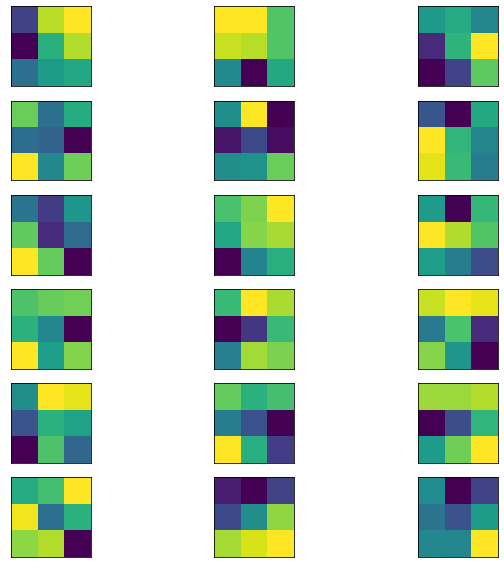

Visualizing filters for Filter number  4


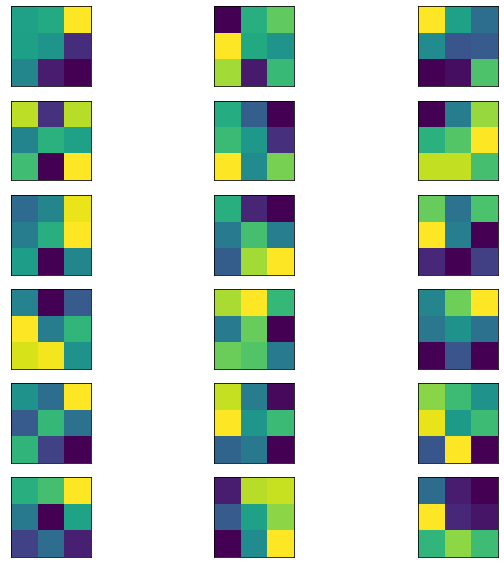

Visualizing filters for Filter number  5


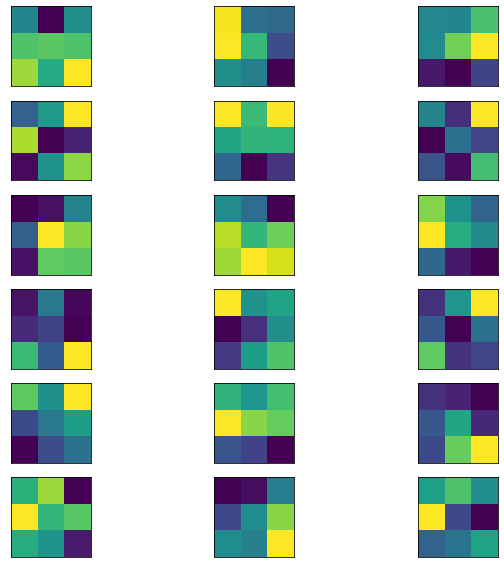

Visualizing filters for Filter number  6


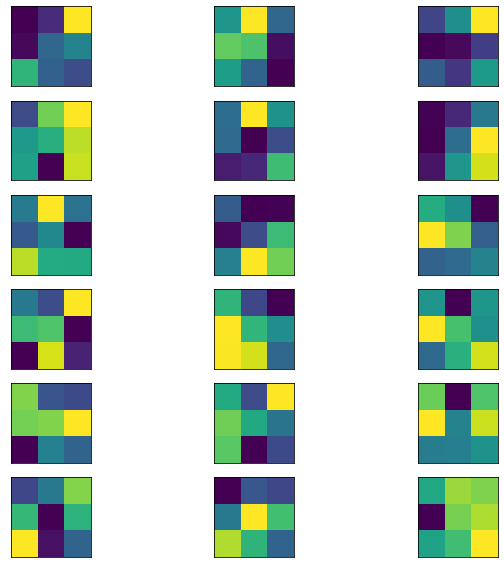

Visualizing filters for Filter number  7


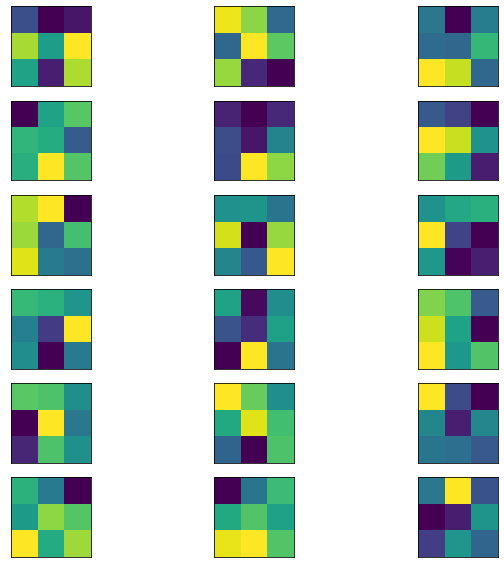

In [0]:
number = 1
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
      continue
    # get filter weights
    filters, biases = layer.get_weights()
    #print(layer.name, filters.shape)

    print("Visualizing filters for Filter number ", number)

    number = number+1
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    # plot first few filters
    n_filters, ix = 6, 1
    _, ax = plt.subplots(n_filters, 3, figsize=(10, 8))

    for i in range(n_filters):
      # get the filter
      f = filters[:, :, :, i]
      # plot each channel separately
      for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap="viridis")
        ix += 1
    # show the figure
    plt.tight_layout()
    plt.show()